$~~~~~~~~~~~$<img src="https://moodlesupd.script.univ-paris-diderot.fr/pluginfile.php/1/theme_foundation/frontpageslideimage1/1585262946/moodle_logo.png" width="350" />
$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$
<img src="http://www.apc.univ-paris7.fr/APC_CS/sites/default/files/logo-apc.png" />




<center>
<h1>
Etude des catalogues COSMOS et True Universe à l'aide des Self Organizing Maps
</h1> 
</center>



<center>

Stage de Master Physique 1 - 2020

Encadrants : Alexandre BOUCAUD, Hubert BRETONNIERE

Rapporteur : Yann RASERA

Stage effectué au sein du laboratoire Astroparticules & Cosmologie sur une durée de 2 mois.

Olivier ROTH
</center>

## Introduction

## Sommaire


* ##   [Colors](#S3)
> ### [First visualization](#S3_1)
> ### [Errors](#S3_4)
> ### [Interactive SOMs](#S3_2)
> ### [Heatmaps](#S3_3)
> ### [SOMperf](#S3_5)
> ### [GHSOM](#S3_6)
> ### [Hyperparams auto](#S3_7)


* ##   [Galaxy catalogs](#S4)
> ### [Loading datasets](#S4_1)
> ### [Comparaisons](#S4_2)
> ### [Selecting variables](#S4_3)
> ### [Training and visualizations](#S4_4)

## Import

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd drive/My\ Drive/Colab\ Notebooks

/content/drive/My Drive/Colab Notebooks


In [3]:
!pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.6-cp36-none-any.whl size=8525 sha256=4a99ba1a3c4825dcaac3d3125c244cf85f3f8f5cfcbab82c6cbc58f88cee86ef
  Stored in directory: /root/.cache/pip/wheels/b8/c6/01/330066e36e1f7c826c96f656f9185822cfcdef0591315949ea
Successfully built minisom


[minisom](https://github.com/JustGlowing/minisom/tree/35e32cf4adeceb807d699c27c044c709c7ca4e3c) on github

In [4]:
from Main_definitions import*

<a name="S3"></a>
# Colors 

<a name="S3_1"></a>
## First visualization

In [ ]:
data_color = dat_color(nb=40000)

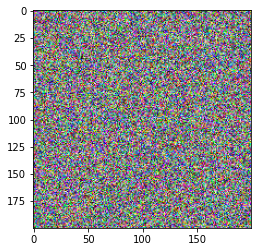

In [ ]:
plt.imshow(data_color.reshape(200,200,3));

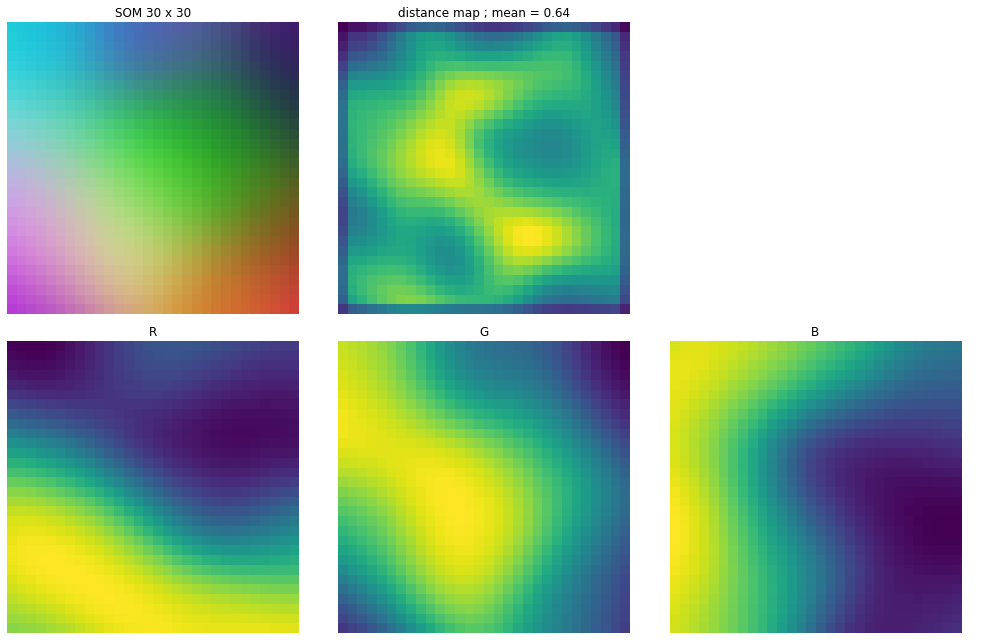

In [ ]:
sigma = 8
learning_rate = 1
som, weights = train_som(data_color, sigma, learning_rate, 1000, size=(30,30))
PlotSOMs(som)

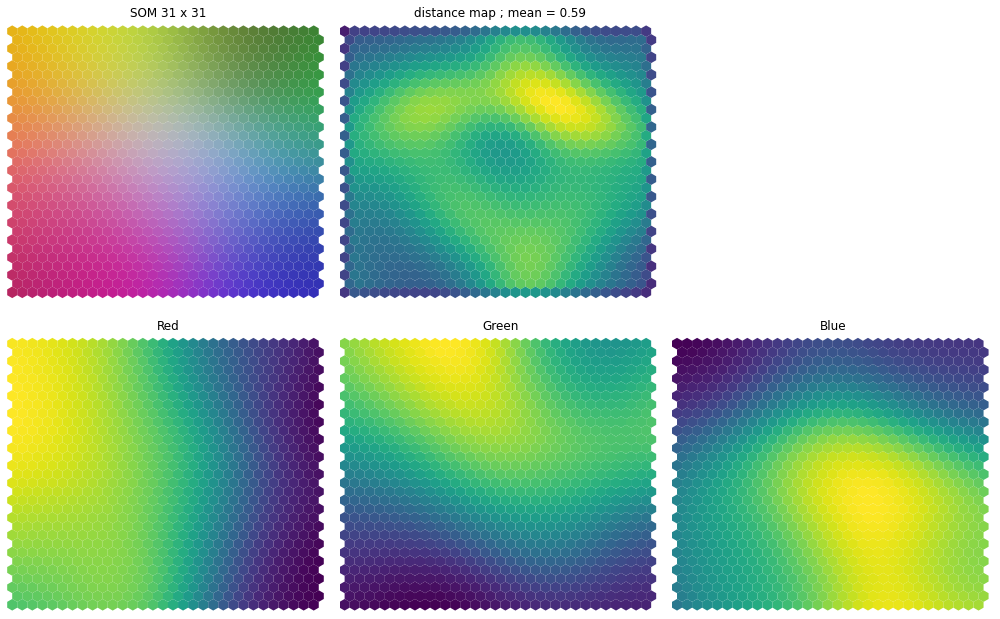

In [ ]:
sigma = 11
learning_rate = 1
topo = 'hexagonal'

som, weights = train_som(data_color, sigma, learning_rate, 2000, topology=topo)
PlotSOMs(som, topology=topo)

<a name="S3_4"></a>
## Errors

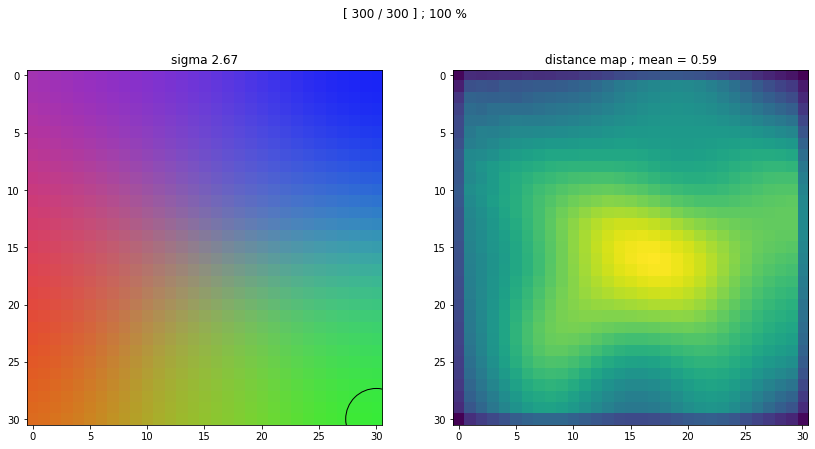

In [ ]:
color_norm = dat_color_norm(nb=40000)

sigma = 8
learning_rate = .2
iterations = 300
frequence = 5

dict_vars = train_and_get_error(color_norm, 
                                sigma, learning_rate, 
                                iterations, frequence,
                                topological_error=True)

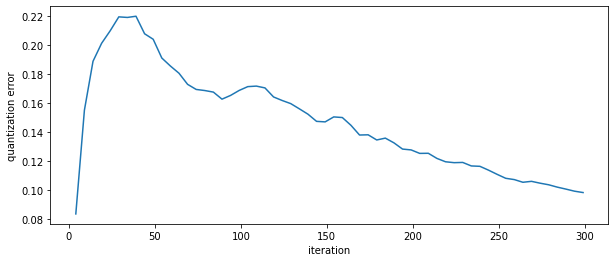

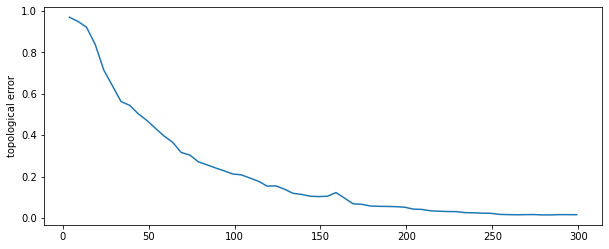

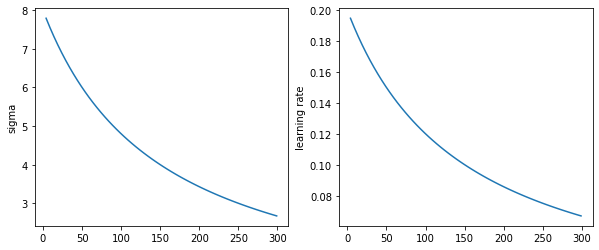

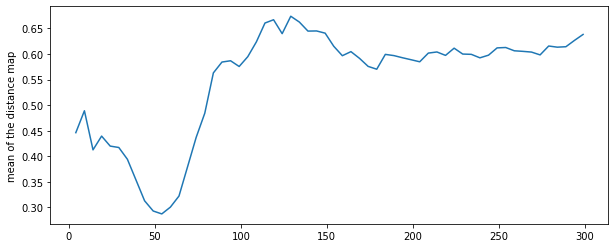

In [6]:
plot_error(dict_vars)

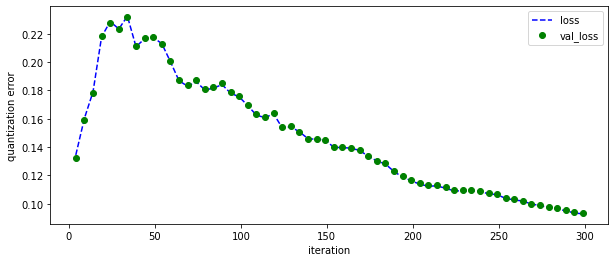

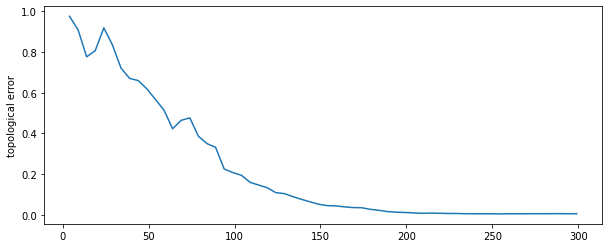

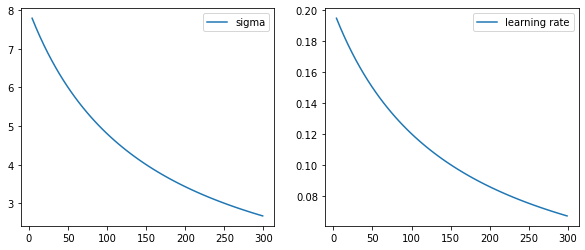

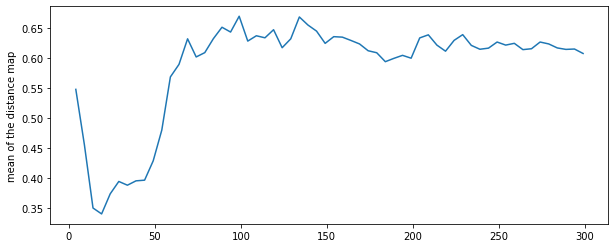

In [ ]:
plot_error(dict_vars)

## Errors fct sigma

 10 / 10

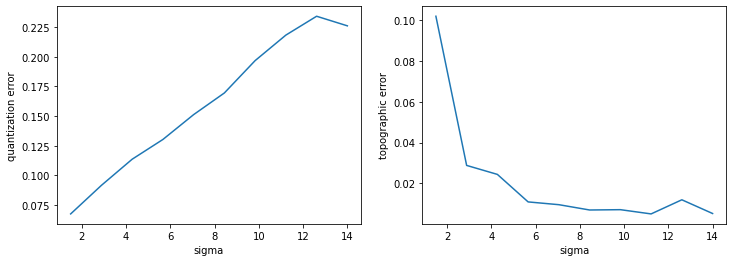

In [5]:
weights_multi, q_error, t_error  = multi_sigma(10, dat_color())

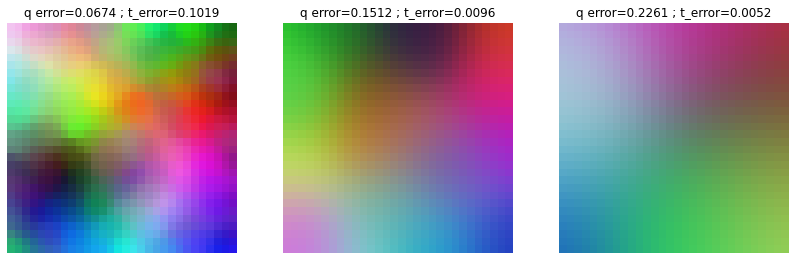

In [10]:
plt.figure(figsize=(14,5))
idx=[0,4,-1]
for i,j in enumerate(idx):
    plt.subplot(1,3,i+1)
    plt.title('q error=%.4f ; t_error=%.4f' % (q_error[j], t_error[j]))
    plt.imshow(weights_multi[j])
    plt.axis('off')
plt.show()

### Choisir graphs à conserver pour rapport

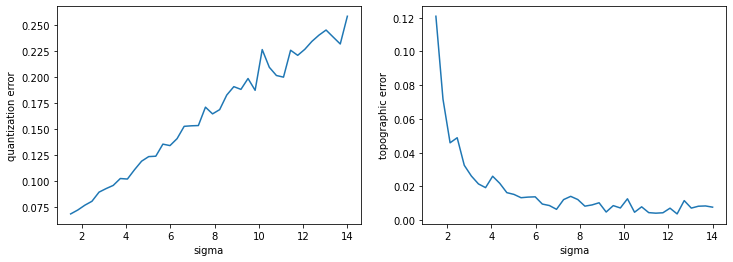

In [78]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(sigma, q_error)
plt.xlabel('sigma')
plt.ylabel('quantization error')

plt.subplot(122)
plt.plot(sigma, t_error)
plt.xlabel('sigma')
plt.ylabel('topographic error');

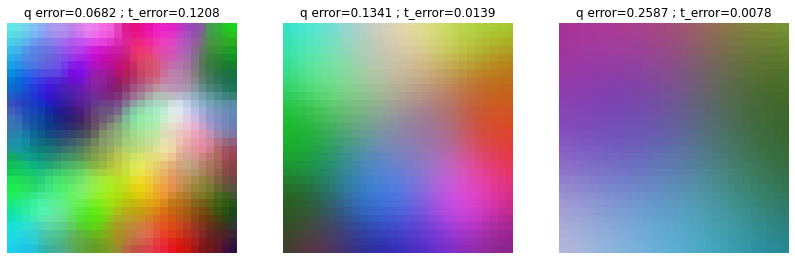

In [89]:
plt.figure(figsize=(14,5))

idx=[0,14,-1]
for i,j in enumerate(idx):
    plt.subplot(1,3,i+1)
    plt.title('q error=%.4f ; t_error=%.4f' % (q_error[j], t_error[j]))
    plt.imshow(W20[j])
    plt.axis('off')
plt.show()

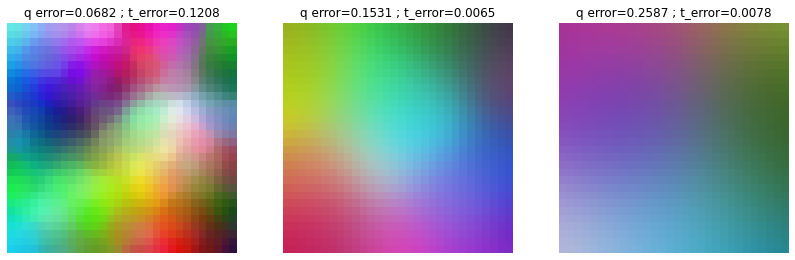

In [90]:
plt.figure(figsize=(14,5))

idx=[0,17,-1]
for i,j in enumerate(idx):
    plt.subplot(1,3,i+1)
    plt.title('q error=%.4f ; t_error=%.4f' % (q_error[j], t_error[j]))
    plt.imshow(W20[j])
    plt.axis('off')
plt.show()

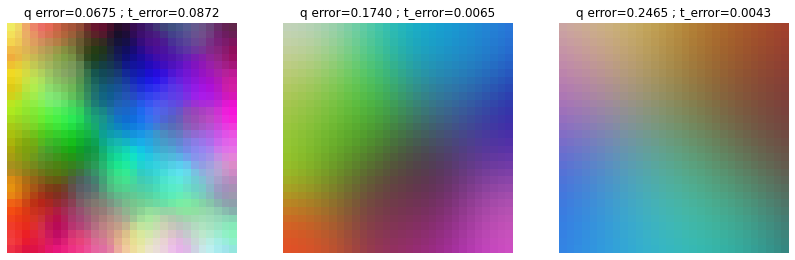

In [67]:
plt.figure(figsize=(14,5))

idx=[0,3,-1]
for i,j in enumerate(idx):
    plt.subplot(1,3,i+1)
    plt.title('q error=%.4f ; t_error=%.4f' % (q_error[j], t_error[j]))
    plt.imshow(W20[j])
    plt.axis('off')
plt.show()

<a name="S3_2"></a>
## Interactive SOMs

In [ ]:
data_color = dat_color_norm()

### Rectangular

In [ ]:
interactive_plot(data_color)

interactive(children=(FloatSlider(value=7.0, description='sigma', layout=Layout(height='20px', width='50%'), m…

### Hexagonal

In [ ]:
interactive_plot(data_color)

interactive(children=(FloatSlider(value=7.0, description='sigma', layout=Layout(height='20px', width='50%'), m…

<a name="S3_3"></a>
## Heatmap, uniform normalized datasets

### norm : /max

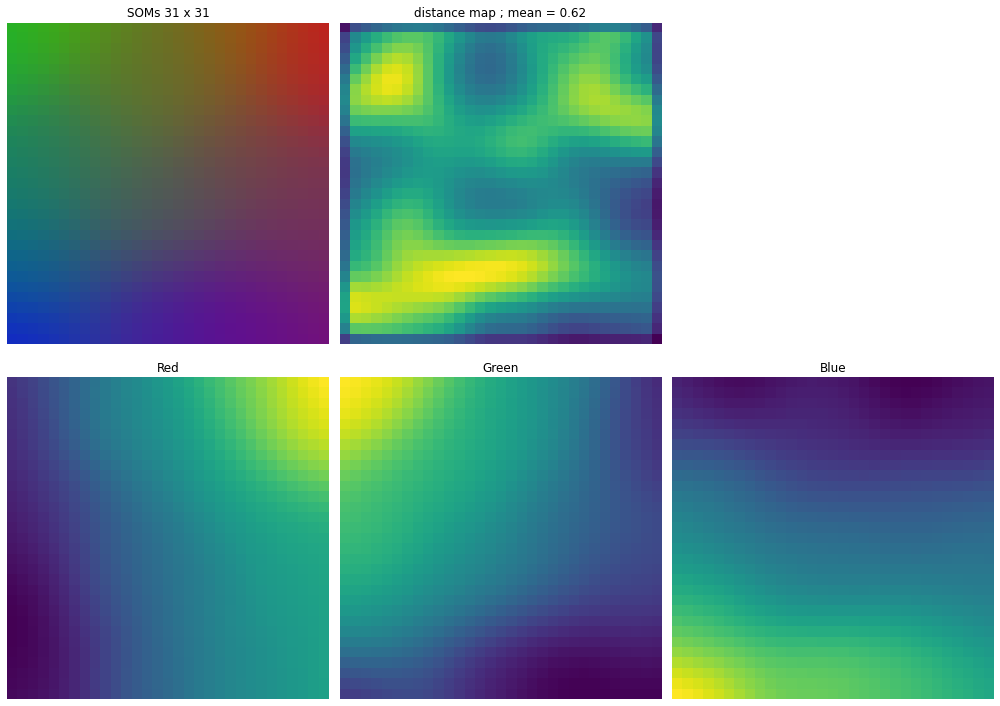

In [ ]:
nb = 40000 ; nb_reshape = int(np.sqrt(nb))

dat1 = np.random.uniform(0,1,nb)
dat2 = np.random.uniform(0,1,nb)
dat3 = np.random.uniform(0,1,nb)

data_color = np.vstack((dat1,dat2,dat3)).T


# normalize each row
sum_of_rows = data_color.sum(axis=1)
data_color = data_color / sum_of_rows[:, np.newaxis]


# SOMs
sigma = 7
learning_rate = 1

som, weights = train_som(data_color, sigma, learning_rate, 5000)
PlotSOMs(data_color, som, weights)

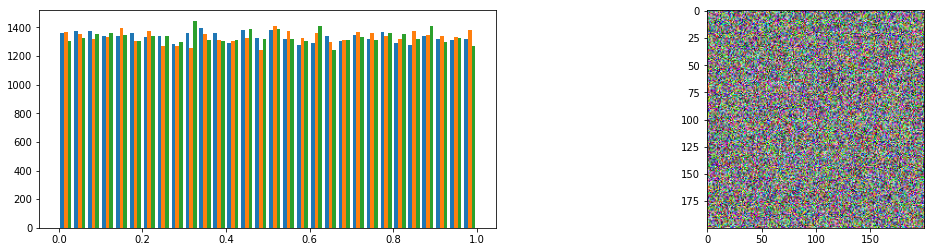

In [ ]:
# before normalization
plt.figure(figsize=(18,4))
plt.subplot(121)
plt.hist(np.vstack((dat1,dat2,dat3)).T, bins=30)
plt.subplot(122)
plt.imshow(np.vstack((dat1,dat2,dat3)).T.reshape(nb_reshape,nb_reshape,3))
plt.show()

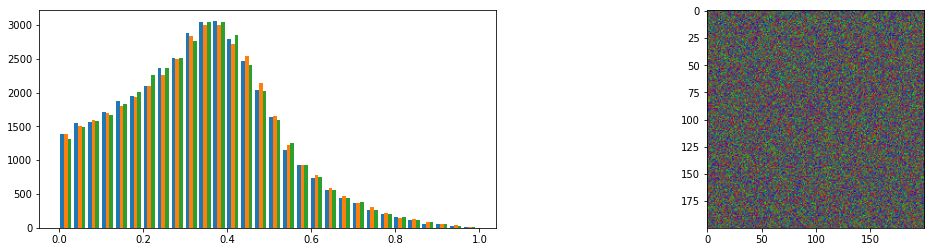

In [ ]:
# after normalization
plt.figure(figsize=(18,4))
plt.subplot(121)
plt.hist(data_color, bins=30)
plt.subplot(122)
plt.imshow(data_color.reshape(nb_reshape,nb_reshape,3))
plt.show()

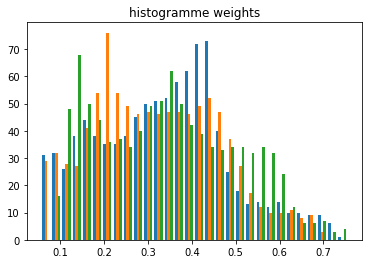

In [ ]:
plt.title("histogramme weights")
plt.hist(weights.reshape( np.prod(weights.shape[0:2]) , 3), bins=30 );

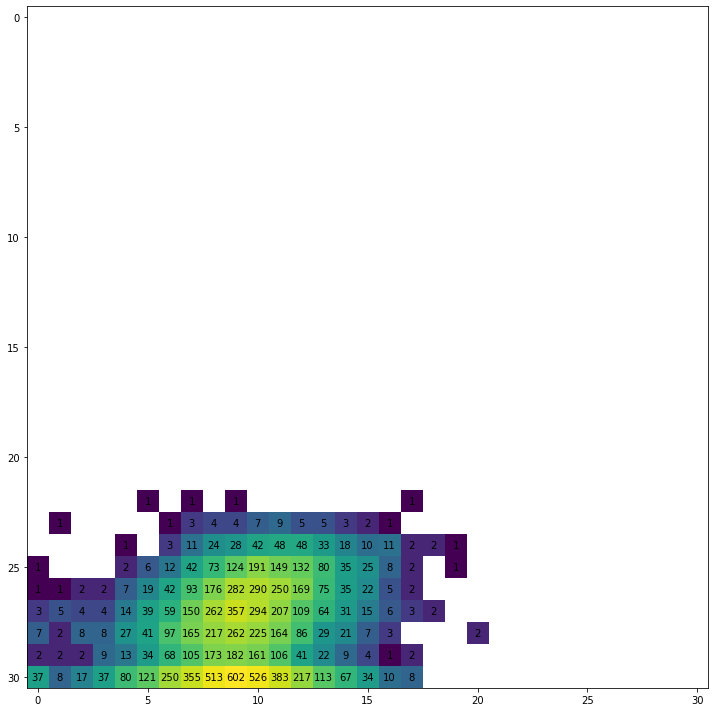

In [ ]:
NB = 10000

a = np.random.normal(.2,.05,NB) # red
b = np.random.normal(.2,.05,NB) # green
c = np.random.normal(.6,.05,NB) # blue ---

abc = np.vstack([a,b,c]).T

# normalize each row
sum_of_rows = abc.sum(axis=1)
abc = abc / sum_of_rows[:, np.newaxis]

Heatmap(som, abc, figsize=(10,10))

### norm : spherical coord

In [ ]:
coord = dat_color_norm(nb=250000)

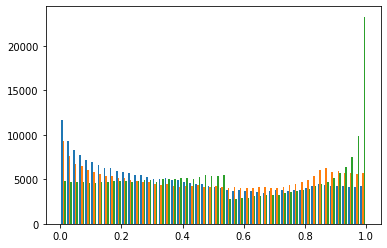

In [ ]:
plt.hist(coord, bins=50);

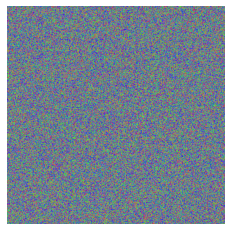

In [ ]:
plt.imshow(coord.reshape(500,500,3))
plt.axis('off');

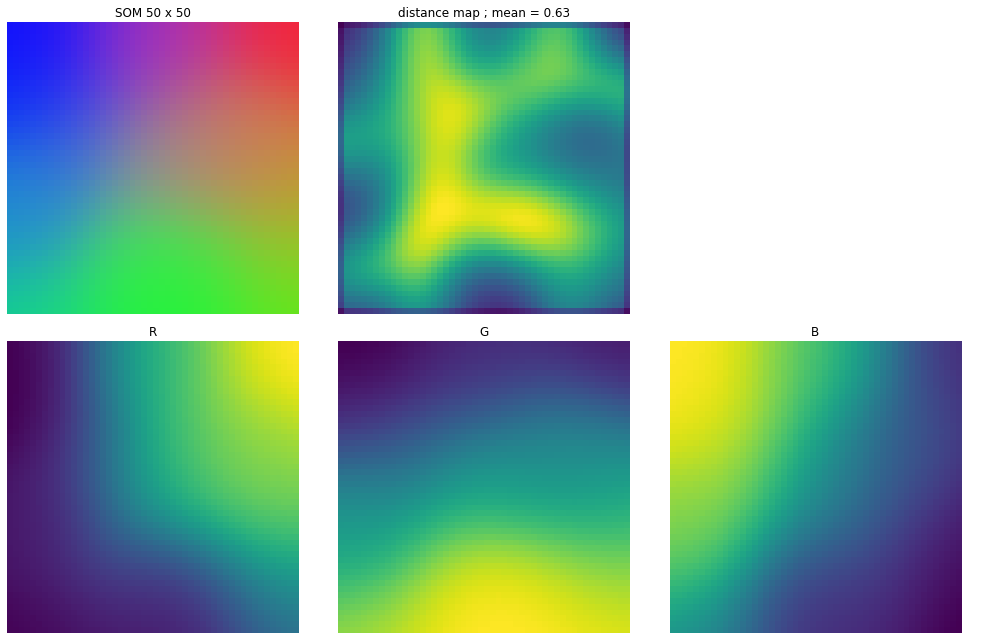

In [ ]:
# SOMs
sigma = 14
learning_rate = 1

som_coord, weights_coord = train_som(coord, sigma, learning_rate, 2000)
PlotSOMs(coord, som_coord, weights_coord)

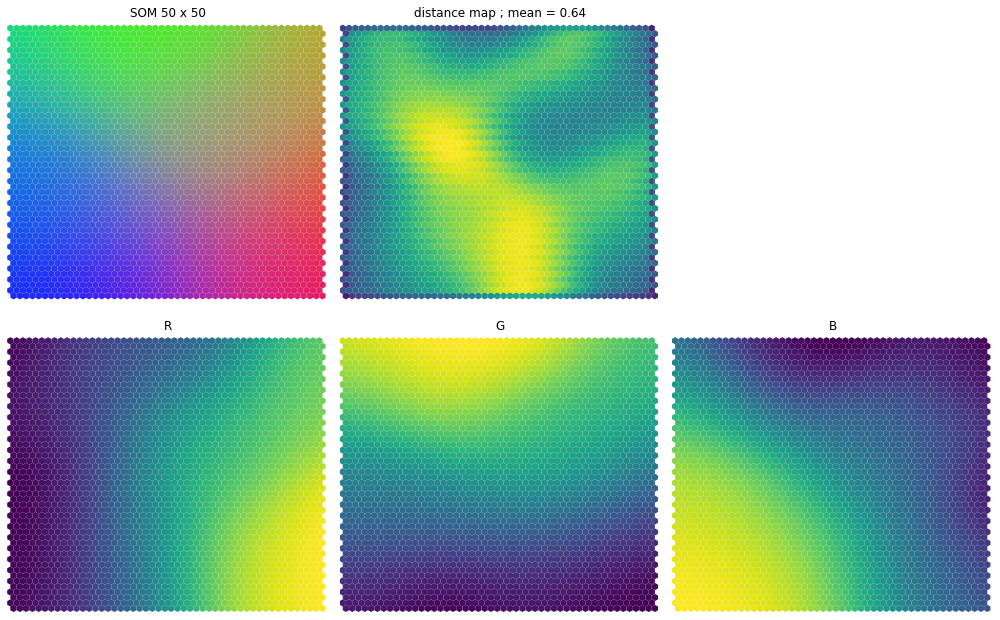

In [ ]:
# SOMs
sigma = 14
learning_rate = 1

som_coord_hexa, weights_coord_hexa = train_som(coord, sigma, learning_rate, 1000, topology='hexagonal')
PlotSOMs(coord, som_coord_hexa, weights_coord_hexa, topology='hexagonal')

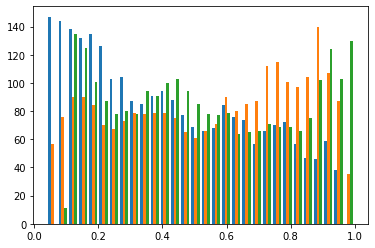

In [ ]:
plt.hist(weights_coord.reshape( np.prod(weights_coord.shape[0:2]) , 3),bins=30);

In [ ]:
NB = 10000

a = np.random.normal(.2,.05,NB) # red
b = np.random.normal(.2,.05,NB) # green
c = np.random.normal(.7,.05,NB) # blue ----

abc = np.vstack([a,b,c]).T

# normalize each row
sum_of_rows = abc.sum(axis=1)
abc = abc / sum_of_rows[:, np.newaxis]

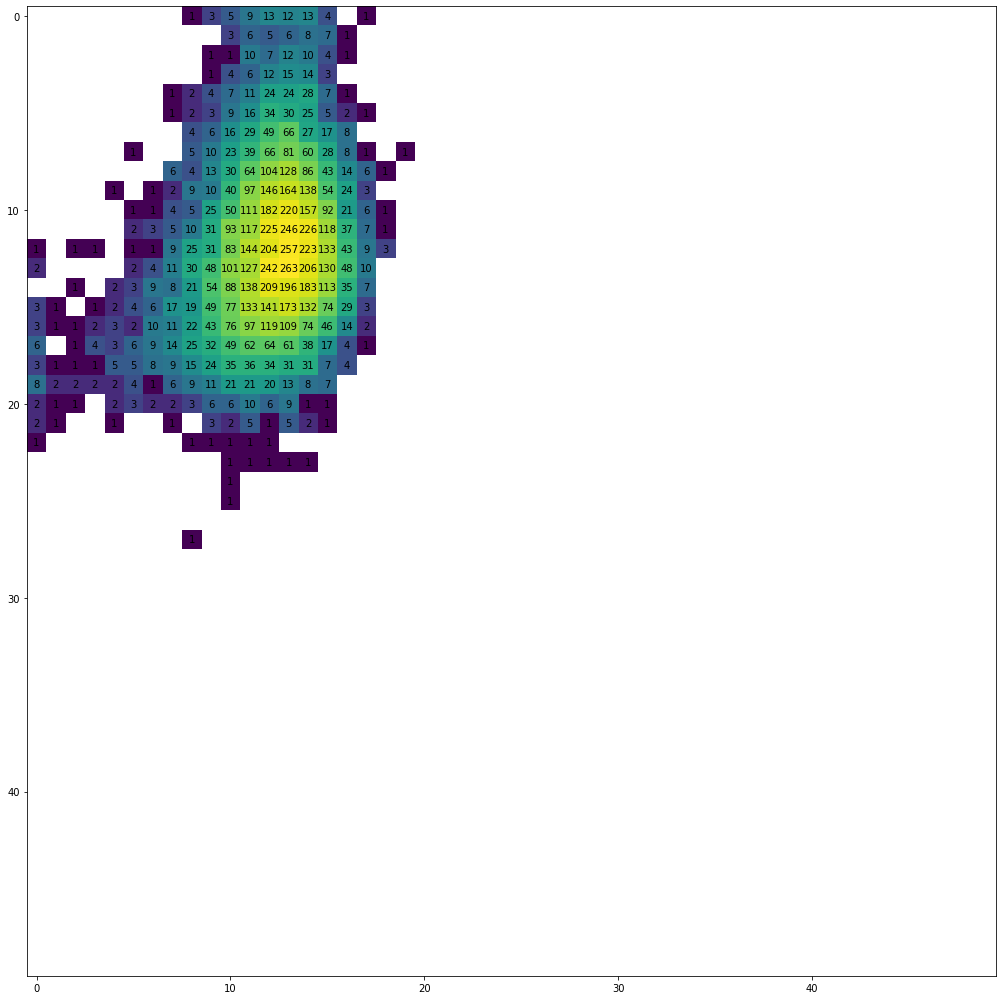

In [ ]:
Heatmap(som_coord, abc, hist_vars=False)

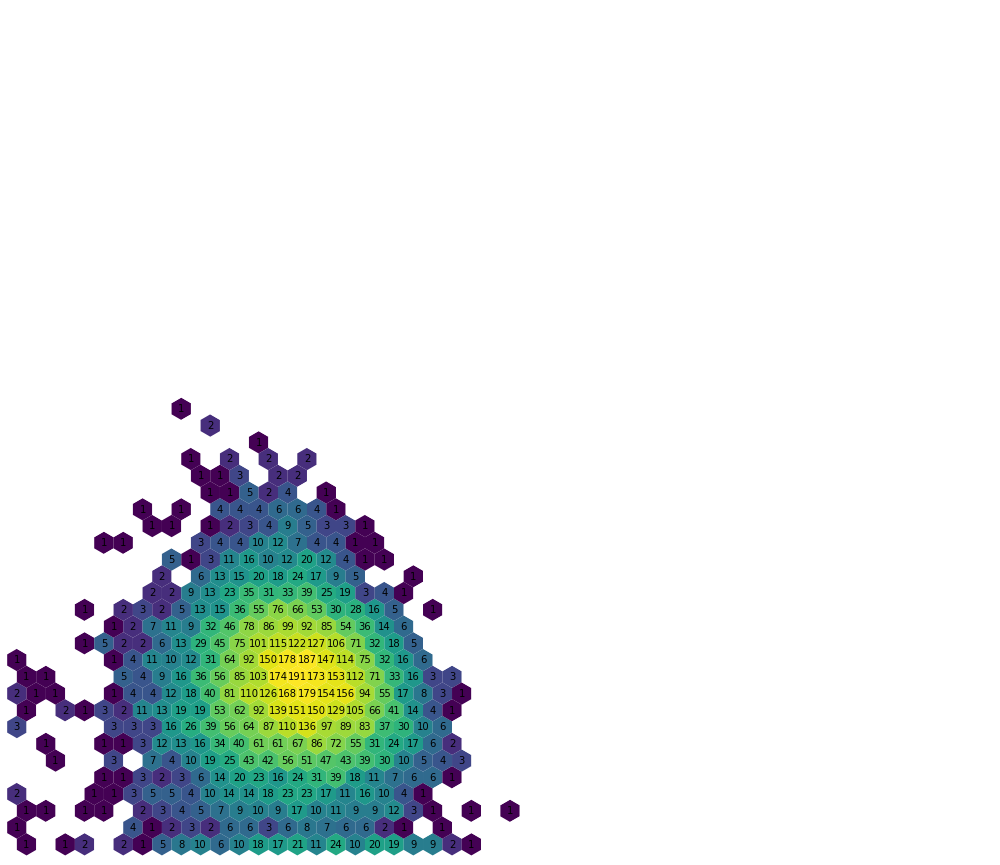

In [ ]:
Heatmap(som_coord_hexa, abc, hist_vars=False, topology='hexagonal')

<a name="S3_5"></a>
## SOMperf


[SOMperf](https://github.com/FlorentF9/SOMperf) on github

In [ ]:
cd som_package/SOMperf

In [ ]:
from somperf.metrics import *
from somperf.utils.topology import rectangular_topology_dist

In [ ]:
cd ../..

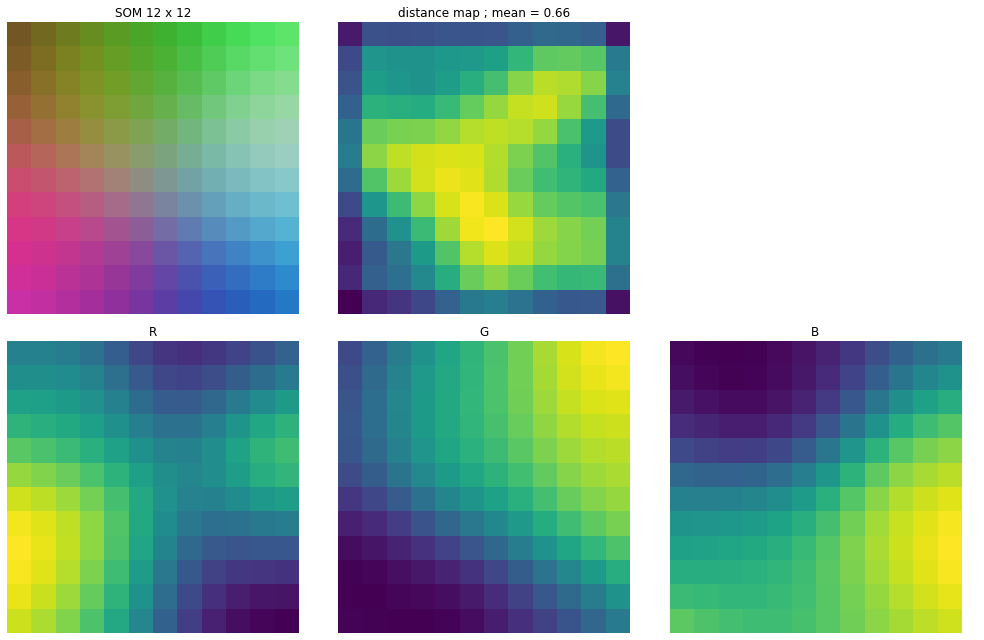

In [ ]:
nb, data_color, color_names = dat_color(nb=1000)

sigma = 4
learning_rate = 1

som, weights = train_som(data_color, sigma, learning_rate, 1000)
PlotSOMs(data_color, som, weights)

In [ ]:
w_r = weights.reshape(weights.shape[0]*weights.shape[1], -1)

In [ ]:
print("quantization error %.3f ; topographic error %.3f" %(
    som.quantization_error(data_color),
    som.topographic_error(data_color)))

quantization error 0.209 ; topographic error 0.029


In [ ]:
print("neighborhood preservation %.3f ; trustworthiness %.3f" %(
    neighborhood_preservation_trustworthiness(1, w_r, data_color)))

neighborhood preservation 0.568 ; trustworthiness 0.953


<a name="S3_6"></a>
## GHSOM

[GHSOM](https://github.com/enry12/growing_hierarchical_som) on github

In [ ]:
cd som_package/growing_hierarchical_som

/content/drive/My Drive/Colab Notebooks/growing_hierarchical_som


In [ ]:
from GHSOM import GHSOM

In [ ]:
cd ../..

/content/drive/My Drive/Colab Notebooks


In [ ]:
nb, data_color, color_names = dat_color()

som = GHSOM(data_color, t1=0.3, t2=0.002, learning_rate=0.15, decay=0.9, gaussian_sigma=1.2)
ghsom = som.train()

print(ghsom)

[Elapsed Time: 0:00:42] |######################################| (25000/25000) 

position (0, 0) -- map dimensions (1, 1, 3) -- input dataset 25000 element(s) -- level 0 
	position (0, 0) -- map dimensions (2, 2, 3) -- input dataset 5785 element(s) -- level 1 
		position (0, 0) -- map dimensions (2, 2, 3) -- input dataset 1572 element(s) -- level 2 
			position (0, 0) -- map dimensions (2, 2, 3) -- input dataset 442 element(s) -- level 3 
				position (0, 0) -- map dimensions (2, 2, 3) -- input dataset 101 element(s) -- level 4 
				position (0, 1) -- map dimensions (2, 2, 3) -- input dataset 115 element(s) -- level 4 
				position (1, 0) -- map dimensions (2, 2, 3) -- input dataset 118 element(s) -- level 4 
				position (1, 1) -- map dimensions (2, 2, 3) -- input dataset 108 element(s) -- level 4 
			position (0, 1) -- map dimensions (2, 2, 3) -- input dataset 393 element(s) -- level 3 
				position (0, 0) -- map dimensions (2, 2, 3) -- input dataset 96 element(s) -- level 4 
				position (0, 1) -- map dimensions (2, 2, 3) -- input dataset 99 element(s) -- level 

In [ ]:
gmap = ghsom.child_map

### gmap

In [ ]:
pos0_0 = gmap.neurons[0,0]

In [ ]:
neurrr = gmap.neurons

In [ ]:
pos0_0_0 = pos0_0.child_map.neurons[0,0]
pos0_0_0

position (0, 0) -- map dimensions (2, 2, 3) -- input dataset 1220 element(s) -- level 0 
	position (0, 0) -- map dimensions (2, 2, 3) -- input dataset 268 element(s) -- level 1 
		position (0, 0) -- map dimensions (2, 2, 3) -- input dataset 71 element(s) -- level 2 
		position (0, 1) -- map dimensions (2, 2, 3) -- input dataset 72 element(s) -- level 2 
		position (1, 0) -- map dimensions (2, 2, 3) -- input dataset 60 element(s) -- level 2 
		position (1, 1) -- map dimensions (2, 2, 3) -- input dataset 65 element(s) -- level 2 
	position (0, 1) -- map dimensions (2, 2, 3) -- input dataset 299 element(s) -- level 1 
		position (0, 0) -- map dimensions (2, 2, 3) -- input dataset 91 element(s) -- level 2 
		position (0, 1) -- map dimensions (2, 2, 3) -- input dataset 68 element(s) -- level 2 
		position (1, 0) -- map dimensions (2, 2, 3) -- input dataset 67 element(s) -- level 2 
		position (1, 1) -- map dimensions (2, 2, 3) -- input dataset 73 element(s) -- level 2 
	position (1, 0) -- m

In [ ]:
pos0_0_0_0 = pos0_0_0.child_map.neurons[0,0]
pos0_0_0_0

position (0, 0) -- map dimensions (2, 2, 3) -- input dataset 268 element(s) -- level 0 
	position (0, 0) -- map dimensions (2, 2, 3) -- input dataset 71 element(s) -- level 1 
	position (0, 1) -- map dimensions (2, 2, 3) -- input dataset 72 element(s) -- level 1 
	position (1, 0) -- map dimensions (2, 2, 3) -- input dataset 60 element(s) -- level 1 
	position (1, 1) -- map dimensions (2, 2, 3) -- input dataset 65 element(s) -- level 1 

In [ ]:
pos0_0_0_0_all = pos0_0_0_0.child_map
pos0_0_0_0_all.weights_map

[array([[[0.41207718, 0.5767142 , 0.55124066],
         [0.28912619, 0.61535766, 0.5637153 ]],
 
        [[0.44100227, 0.57605806, 0.62626278],
         [0.30449188, 0.61564421, 0.68280996]]])]

In [ ]:
pos0_0_0_0_0 = pos0_0_0_0.child_map.neurons[0,0]
pos0_0_0_0_0

position (0, 0) -- map dimensions (2, 2, 3) -- input dataset 71 element(s) -- level 0 

In [ ]:
pos0_0_0_0_0._Neuron__weight_map[0]

array([[[0.41207718, 0.5767142 , 0.55124066],
        [0.28912619, 0.61535766, 0.5637153 ]],

       [[0.44100227, 0.57605806, 0.62626278],
        [0.30449188, 0.61564421, 0.68280996]]])

In [ ]:
for i in gmap.neurons.keys():
    print(i)

(0, 0)
(0, 1)
(1, 0)
(1, 1)


### tab weights

In [ ]:
import matplotlib.gridspec as gridspec

In [ ]:
fig = plt.figure(figsize=(8,8))
outer = gridspec.GridSpec(2, 2, wspace=0., hspace=0.)

for i in range(4):
    inner = gridspec.GridSpecFromSubplotSpec(2, 2,
                    subplot_spec=outer[i], wspace=0., hspace=0.)

    for j in range(4):
        ax = plt.Subplot(fig, inner[j])
        t = ax.text(0.5,0.5, 'outer=%d, inner=%d' % (i,j))
        t.set_ha('center')
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)

fig.show()

In [ ]:
lvl_0 = np.zeros((2,2),dtype=object)
tab_weights = []

idx1=-1
for i in gmap.neurons.keys():
    lvl_0[i] = gmap.neurons[i]
    gmap_1 = lvl_0[i].child_map
    idx1+=1

    idx2=-1
    for m in np.concatenate(gmap_1.weights_map[0]):
        idx2+=1
        tab_weights.append([idx1,idx2,m])

tab_weights = np.array(tab_weights)
print(tab_weights.shape)
tab_weights

(16, 3)


array([[0, 0, array([0.52571697, 0.20877727, 0.79427922])],
       [0, 1, array([0.85121238, 0.18986697, 0.8331853 ])],
       [0, 2, array([0.82107975, 0.51109716, 0.70590665])],
       [0, 3, array([0.85604511, 0.19571159, 0.3502901 ])],
       [1, 0, array([0.43259709, 0.20578476, 0.42021136])],
       [1, 1, array([0.54106589, 0.19611846, 0.12573268])],
       [1, 2, array([0.15090118, 0.18873863, 0.6730285 ])],
       [1, 3, array([0.15923283, 0.35587744, 0.26135234])],
       [2, 0, array([0.48254309, 0.76068745, 0.72818485])],
       [2, 1, array([0.24749082, 0.53874479, 0.84727972])],
       [2, 2, array([0.81493589, 0.86634655, 0.81620095])],
       [2, 3, array([0.12434541, 0.81241713, 0.66136908])],
       [3, 0, array([0.5308    , 0.72755129, 0.24840269])],
       [3, 1, array([0.84154898, 0.80324239, 0.29096683])],
       [3, 2, array([0.19534749, 0.7846272 , 0.17617142])],
       [3, 3, array([0.78067388, 0.51192669, 0.14921713])]], dtype=object)

In [ ]:
tab16_3 = np.array(tab_weights[:,-1].tolist())
tab16_2x = tab16_3.reshape(4,2,2,3)

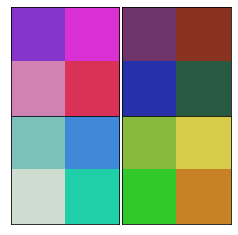

In [ ]:
fig = plt.figure(figsize=(4,4))
outer = gridspec.GridSpec(2, 2, wspace=0., hspace=0.)

for j in range(4):
    ax = plt.Subplot(fig, outer[j])

    ax.imshow(tab16_2x[j])

    ax.set_xticks([])
    ax.set_yticks([])
    fig.add_subplot(ax)

fig.show()

In [ ]:
lvl_0 = np.zeros((2,2),dtype=object)
lvl_1 = np.zeros((2,2),dtype=object)
lvl_2 = np.zeros((2,2),dtype=object)
tab_weights = []

idx1=-1
for i in gmap.neurons.keys():
    lvl_0[i] = gmap.neurons[i]
    gmap_1 = lvl_0[i].child_map
    idx1+=1

    idx2=-1
    for j in gmap_1.neurons.keys():
        lvl_1[j] = gmap_1.neurons[j]
        gmap_2 = lvl_1[j].child_map
        idx2+=1

        idx3=-1
        for k in gmap_2.neurons.keys():
            lvl_2[k] = gmap_2.neurons[k]
            
            if lvl_2[k].child_map is not None:
                gmap_3 = lvl_2[k].child_map
            else:
                gmap_3 = lvl_2[k]
            idx3+=1

            idx4=-1
            try:
                for l in np.concatenate(gmap_3.weights_map[0]):
                    idx4+=1
                    tab_weights.append([idx1,idx2,idx3,idx4,l])
            except:
                for l in np.concatenate(gmap_3._Neuron__weight_map[0]):
                    idx4+=1
                    tab_weights.append([idx1,idx2,idx3,idx4,l])

tab_weights = np.array(tab_weights)
print(tab_weights.shape)
tab_weights

(256, 5)


array([[0, 0, 0, 0, array([0.40001374, 0.20671726, 0.83069416])],
       [0, 0, 0, 1, array([0.33322367, 0.23432446, 0.94664094])],
       [0, 0, 0, 2, array([0.49372257, 0.1030418 , 0.94490221])],
       ...,
       [3, 3, 3, 1, array([0.91855109, 0.5320465 , 0.08864762])],
       [3, 3, 3, 2, array([0.83536531, 0.53989307, 0.30887601])],
       [3, 3, 3, 3, array([0.90488153, 0.46577634, 0.20653181])]],
      dtype=object)

In [ ]:
tab256_5 = np.array(tab_weights[:,-1].tolist())

tab256_2x = tab256_5.reshape(4,4,4,2,2,3)

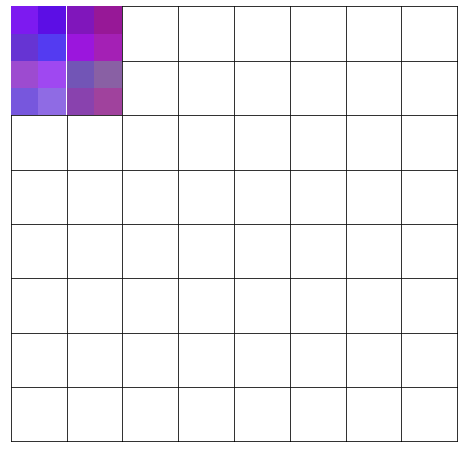

In [ ]:
fig = plt.figure(figsize=(8,8))
outer = gridspec.GridSpec(2, 2, wspace=.0, hspace=.0)

for i in range(4):
    inner = gridspec.GridSpecFromSubplotSpec(2, 2,
                    subplot_spec=outer[i], wspace=.0, hspace=.0)

    for j in range(4):
        if i==0 and j==0:
            ax = plt.Subplot(fig, inner[j])
            inner2 = gridspec.GridSpecFromSubplotSpec(2, 2,
                        subplot_spec=inner[j], wspace=.0, hspace=.0)


            for k in range(4):
                ax1 = plt.Subplot(fig, inner2[k])

                ax1.imshow(tab256_2x[i,j,k],origin="lower")
                ax1.axis('off')

                ax1.set_xticks([]) ; ax1.set_yticks([])
                fig.add_subplot(ax1)
        else:
            ax = plt.Subplot(fig, inner[j])
            inner2 = gridspec.GridSpecFromSubplotSpec(2, 2,
                        subplot_spec=inner[j], wspace=.0, hspace=.0)

            for k in range(4):
                ax1 = plt.Subplot(fig, inner2[k])
                #ax1.imshow(tab256_2x[i,j,k],origin="lower")
                #ax1.axis('off')
                ax1.set_xticks([]) ; ax1.set_yticks([])
                fig.add_subplot(ax1)
plt.show()

In [ ]:
tab256_2xT = np.transpose(tab256_2x, (0,2,1,3,4,5)).reshape(4,4,4,2,2,3)

In [ ]:
np.transpose(tab256_2x, (0,1,2,4,3,5)).reshape(4,4,4,2,2,3)[0,0]

array([[[[0.40001374, 0.20671726, 0.83069416],
         [0.49372257, 0.1030418 , 0.94490221]],

        [[0.33322367, 0.23432446, 0.94664094],
         [0.36392465, 0.05597361, 0.90159525]]],


       [[[0.60806049, 0.08972033, 0.87000943],
         [0.50261614, 0.08818855, 0.73441612]],

        [[0.64683327, 0.12827871, 0.71313403],
         [0.59536579, 0.09463338, 0.59529699]]],


       [[[0.46806224, 0.34438305, 0.86768883],
         [0.6177905 , 0.29573308, 0.81905665]],

        [[0.56305641, 0.42279438, 0.8974439 ],
         [0.62480017, 0.2835048 , 0.94749121]]],


       [[[0.53853565, 0.25962637, 0.68609191],
         [0.44822803, 0.3360841 , 0.7143971 ]],

        [[0.62855281, 0.25944312, 0.61711839],
         [0.54078101, 0.37717423, 0.64412695]]]])

In [ ]:
tab256_2x[0,0]

array([[[[0.40001374, 0.20671726, 0.83069416],
         [0.33322367, 0.23432446, 0.94664094]],

        [[0.49372257, 0.1030418 , 0.94490221],
         [0.36392465, 0.05597361, 0.90159525]]],


       [[[0.60806049, 0.08972033, 0.87000943],
         [0.64683327, 0.12827871, 0.71313403]],

        [[0.50261614, 0.08818855, 0.73441612],
         [0.59536579, 0.09463338, 0.59529699]]],


       [[[0.46806224, 0.34438305, 0.86768883],
         [0.56305641, 0.42279438, 0.8974439 ]],

        [[0.6177905 , 0.29573308, 0.81905665],
         [0.62480017, 0.2835048 , 0.94749121]]],


       [[[0.53853565, 0.25962637, 0.68609191],
         [0.62855281, 0.25944312, 0.61711839]],

        [[0.44822803, 0.3360841 , 0.7143971 ],
         [0.54078101, 0.37717423, 0.64412695]]]])

In [ ]:
tab256_2x.shape

(4, 4, 4, 2, 2, 3)

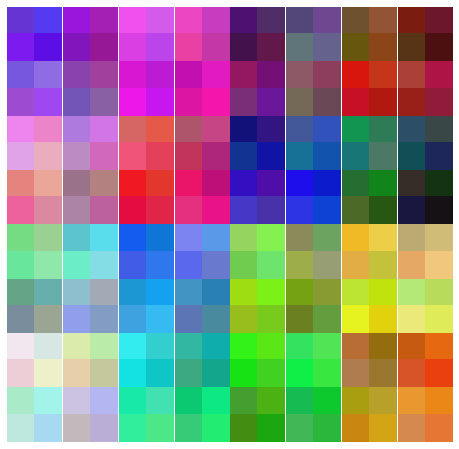

In [ ]:
fig = plt.figure(figsize=(8,8))
outer = gridspec.GridSpec(2, 2, wspace=.0, hspace=.0)

for i in range(4):
    inner = gridspec.GridSpecFromSubplotSpec(2, 2,
                    subplot_spec=outer[i], wspace=.0, hspace=.0)

    for j in range(4):
        ax = plt.Subplot(fig, inner[j])
        inner2 = gridspec.GridSpecFromSubplotSpec(2, 2,
                    subplot_spec=inner[j], wspace=.0, hspace=.0)

        for k in range(4):
            ax1 = plt.Subplot(fig, inner2[k])

            ax1.imshow(tab256_2x[i,j,k])
            ax1.axis('off')

            ax1.set_xticks([]) ; ax1.set_yticks([])
            fig.add_subplot(ax1)
plt.show()

<a name="S3_7"></a>
## Hyperparams auto

In [ ]:
from hyperopt import (fmin, 
                      tpe, 
                      hp, 
                      Trials, 
                      STATUS_OK)

In [ ]:
# finding the 2 parameters at the same time

nb, data_color, color_names = dat_color(nb=40000)

#som_x = int(np.sqrt(5*np.sqrt(nb)))
som_x = 25
som_y = som_x


space = {'sig' : hp.uniform('sig', 2, som_x/2.01),
         'learnR' :hp.uniform('learnR', 0.01, 3)}

def som_fn(space):
    sig = space['sig']
    learnR = space['learnR']


    som, weights = train_som(data_color, sig, learnR, 1500, size=(som_x,som_y))
    val = som.quantization_error(data_color)

    #val = MiniSom(som_x, som_y, data_color.shape[1],sig,learnR,).quantization_error(data_color)

    return {'loss': val, 'status': STATUS_OK}


trials = Trials()
best_params = fmin(
    fn = som_fn,
    space = space,
    algo = tpe.suggest,
    max_evals = 100,
    trials = trials
    )

sigma = best_params['sig']
learning_rate = best_params['learnR']

print("sigma = %f ; learning rate %f \n" % (sigma, learning_rate))

100%|██████████| 100/100 [00:48<00:00,  2.08it/s, best loss: 0.08639185027055596]
sigma = 2.058692 ; learning rate 1.147775 



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


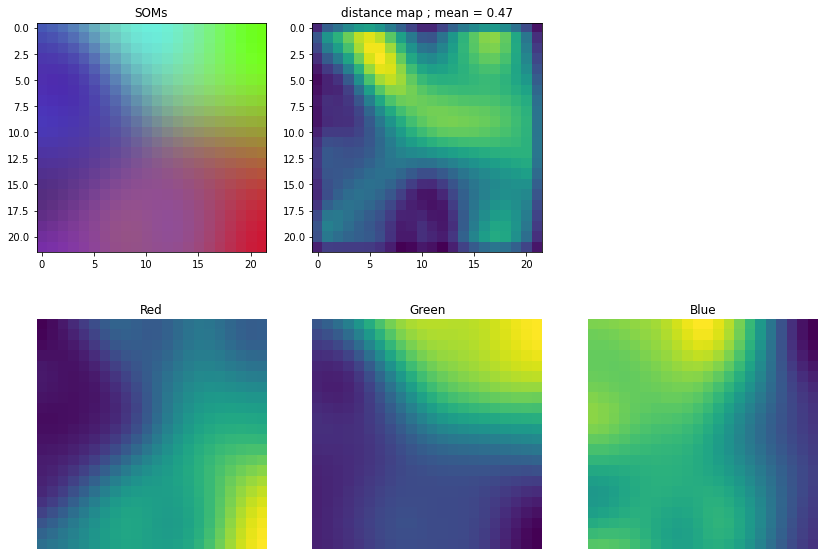

In [ ]:
som, wts_color = train_som(data_color, sigma, learning_rate, 1000)
PlotSOMs(data_color, som, wts_color) # sigma = 9.263, learning_rate = 3.905

In [ ]:
# finding sigma only
rows = data_color.shape[0]
som_x = int(np.sqrt(5*np.sqrt(rows)))
som_y = som_x

learning_rate = 1

best_sig = fmin(
    fn = lambda sig : MiniSom(som_x,som_y,
                              data_color.shape[1],
                              sig,
                              learning_rate
                              ).quantization_error(data_color),
    space = hp.uniform("sig", som_x/10, som_x/2.01),
    algo = tpe.suggest,
    max_evals=200)

sigma = best_sig["sig"]
print(sigma)

100%|██████████| 200/200 [00:48<00:00,  4.12it/s, best loss: 0.23659006291835552]
8.762504662317241


sigma = 8.76 ; learning rate 1.00 



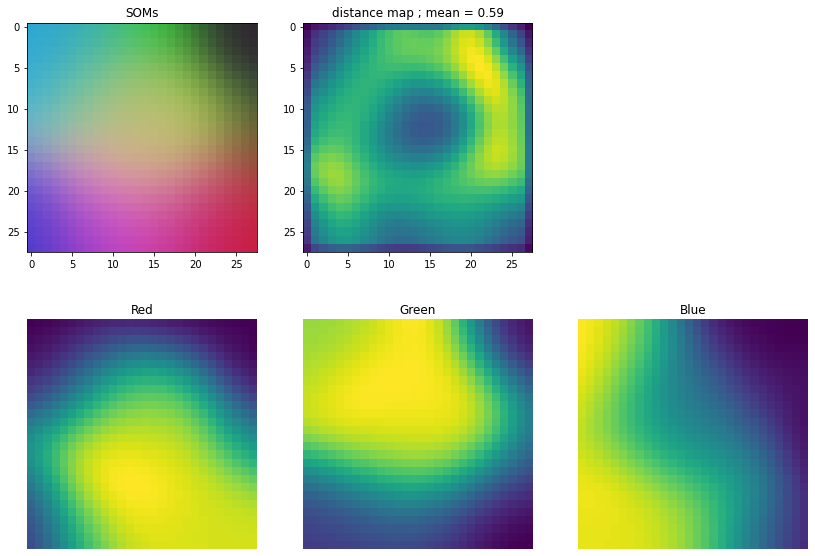

In [ ]:
print("sigma = %.2f ; learning rate %.2f \n" % (sigma, learning_rate))

som, wts_color = train_som(data_color, sigma, learning_rate, 1000, verbose=False)
som_color(data_color, som, wts_color, color_names)

<a name="S4"></a>
# Galaxy catalogs

<a name="S4_1"></a>
## Loading Datasets

In [ ]:
# COSMOS
path_CS_fits = "datas/real_galaxy_catalog_25.2_fits.fits"
data_cs = load_cat(path_CS_fits)


# True Universe
path_TU = "datas/TU_created.fits"
data_tu = load_cat(path_TU)

# other fields of True Universe
data_tu_i = []
for i in range(4):
    path_TU_i = "datas/TU_created%s.fits"%str(i+1)
    data_tu_i.append(load_cat(path_TU_i))


# extracting TU catalogs into dict
data_tu_ex0 = extract_tu(data_tu)

data_tu_exi =[]
for i in range(4):
    data_tu_exi.append(extract_tu(data_tu_i[i]))

# fuse TU fields :
TU_fuse = mergeDict(data_tu_ex0, data_tu_exi[0])
for i in range(1,4):
    TU_fuse = mergeDict(TU_fuse, data_tu_exi[i])

In [ ]:
# normalize
data_cs_ = cut_normalize_view({"COSMOS": data_cs}, init_view=False, norm_and_view=(True,False))
data_tu_ = cut_normalize_view({"TU": data_tu_ex0}, init_view=False, norm_and_view=(True,False))
data_tu_fuse_ = cut_normalize_view({"TU_fuse": TU_fuse}, init_view=False, norm_and_view=(True,False))


COSMOS catalog loaded 

hlr : nb d'elements suppr 272
sersic : nb d'elements suppr 6660
--------------------------


TU catalog loaded 

hlr : nb d'elements suppr 3
--------------------------


TU_fuse catalog loaded 

hlr : nb d'elements suppr 11
--------------------------




<a name="S4_2"></a>
## Comparaisons

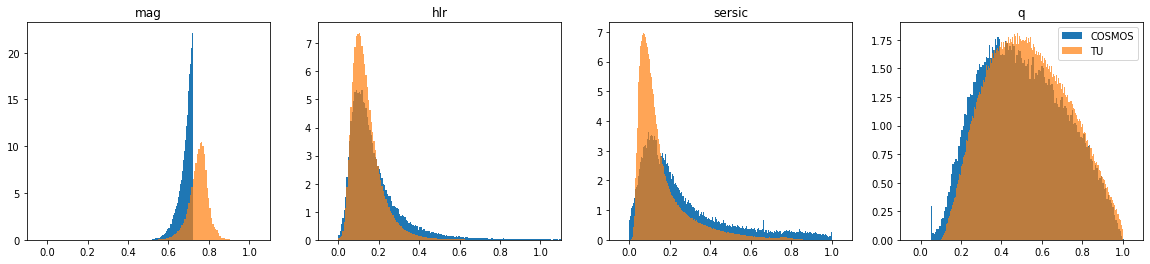

In [ ]:
compare_CS_TU(data_cs_, data_tu_fuse_)

<a name="S4_3"></a>
## Selecting variables

COSMOS :

In [ ]:
check_cs, vars_cs = check_vars(data_cs_)

Output()

True Universe :

In [ ]:
#cat_tu = data_tu_.copy()
cat_tu = data_tu_fuse_.copy()

check_tu, vars_tu = check_vars(cat_tu)

Output()

In [ ]:
# validation
choice_cs = np.array(check_cs).T
nb_cs = choice_cs.shape[0] # number of rows

choice_tu = np.array(check_tu).T
nb_tu = data_tu.shape[0] # number of rows 

<a name="S4_4"></a>
## Training and visualizations

### Gx mag cut


#### Visualization of the "issue"

datasets normalized, training on TU, Heatmap on COSMOS

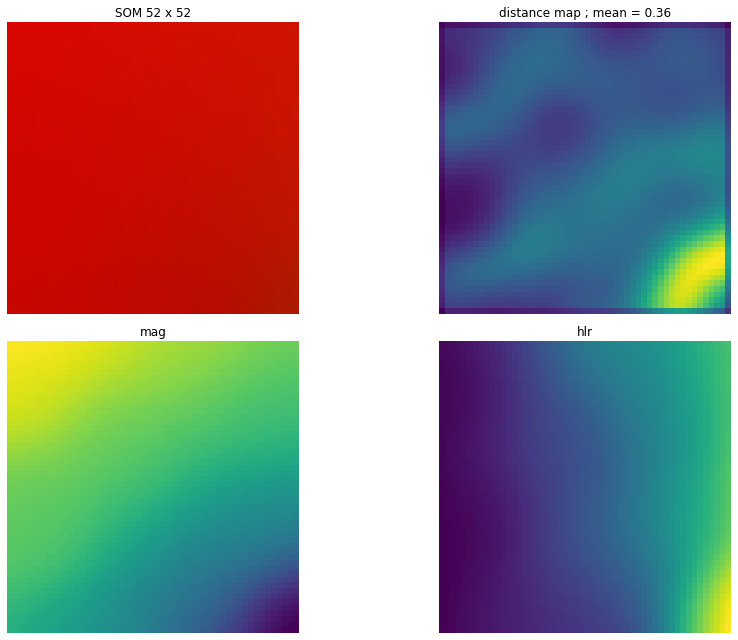

In [ ]:
sigma = 12
learning_rate = 1
topo = 'rectangular'

som_tu, weights_tu = train_som(choice_tu, sigma, learning_rate, 2000, topology=topo)
PlotSOMs(choice_tu, som_tu, weights_tu, vars_tu, topology=topo)

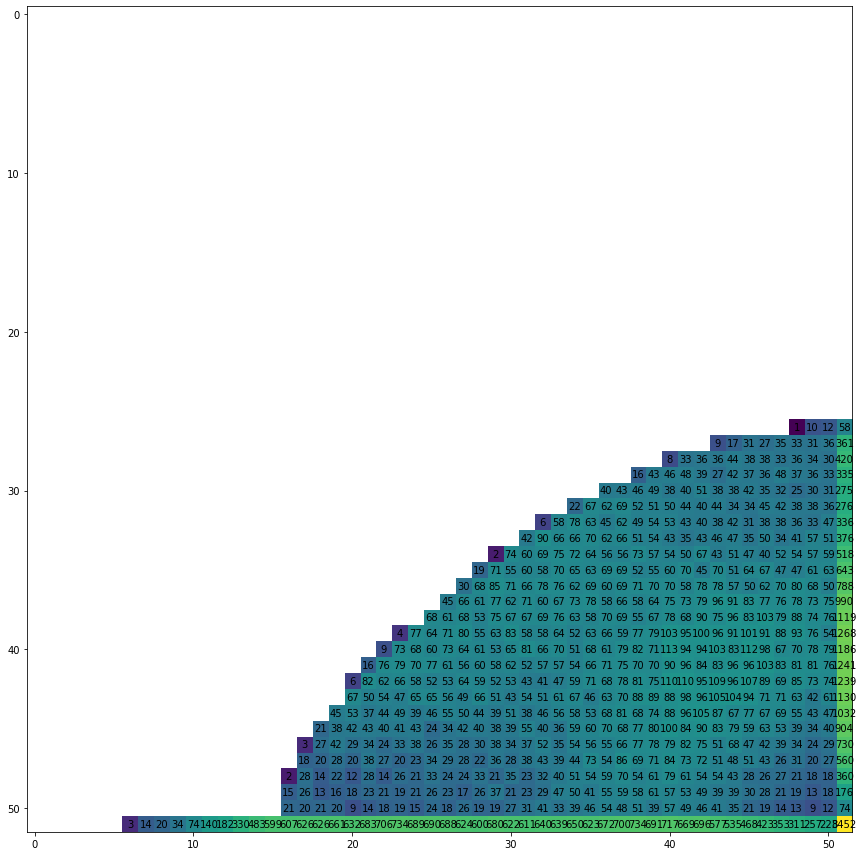

In [ ]:
Heatmap(som_tu, choice_cs, figsize=(12,12), topology=topo)

visualiazation of heatmaps for TU mag sup/inf max(mag(TU))

In [ ]:
mag_tu_sup_cs = data_tu_['mag'][np.where(data_tu_['mag']>0.7636)[0]]
hlr_mag_tu_sup_cs = data_tu_['hlr'][np.where(data_tu_['mag']>0.7636)[0]]

cut_mag_sup = np.vstack([mag_tu_sup_cs, hlr_mag_tu_sup_cs]).T

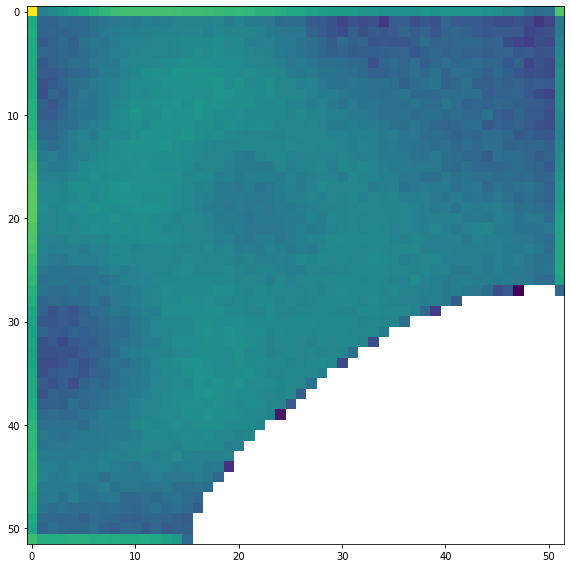

In [ ]:
Heatmap(som_tu, cut_mag_sup, hit_count=False, figsize=(8,8), topology=topo)

In [ ]:
mag_tu_inf_cs = data_tu_['mag'][np.where(data_tu_['mag']<0.7636)[0]]
hlr_mag_tu_inf_cs = data_tu_['hlr'][np.where(data_tu_['mag']<0.7636)[0]]

cut_mag_inf = np.vstack([mag_tu_inf_cs, hlr_mag_tu_inf_cs]).T

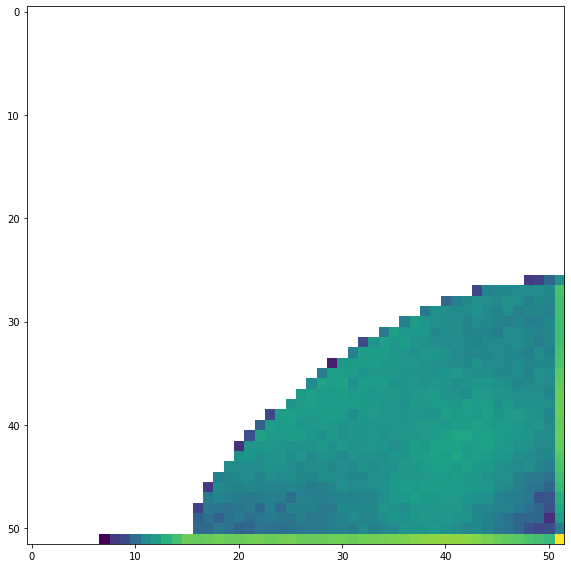

In [ ]:
Heatmap(som_tu, cut_mag_inf, hit_count=False, figsize=(8,8), topology=topo)

---

#### Full TU catalog

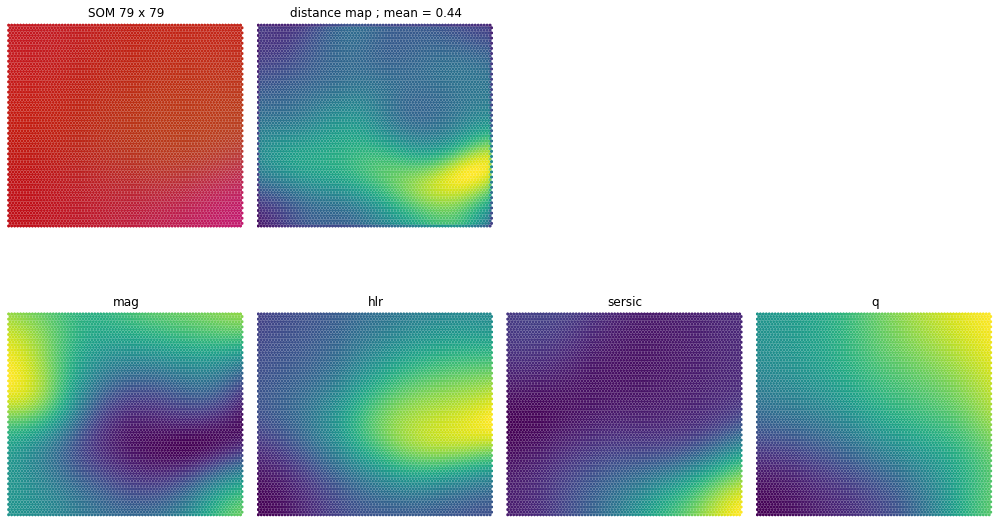

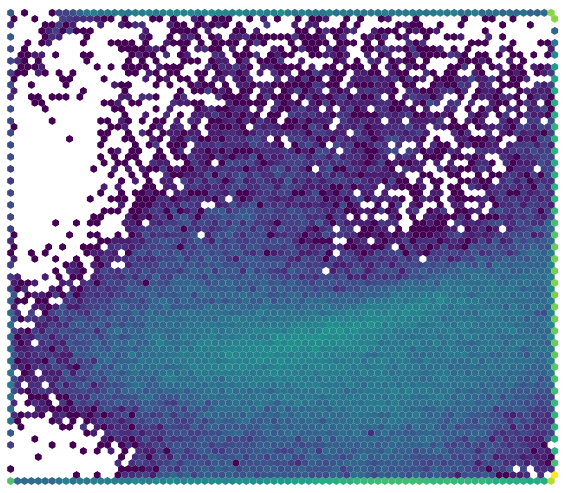

In [ ]:
sigma = 25
learning_rate = 1
topo = 'hexagonal'

som_tu, weights_tu = train_som(choice_tu, sigma, learning_rate, 2000, topology=topo)
PlotSOMs(choice_tu, som_tu, weights_tu, vars_tu, topology=topo)

Heatmap(som_tu, choice_cs, hit_count=False, figsize=(8,8), topology=topo)

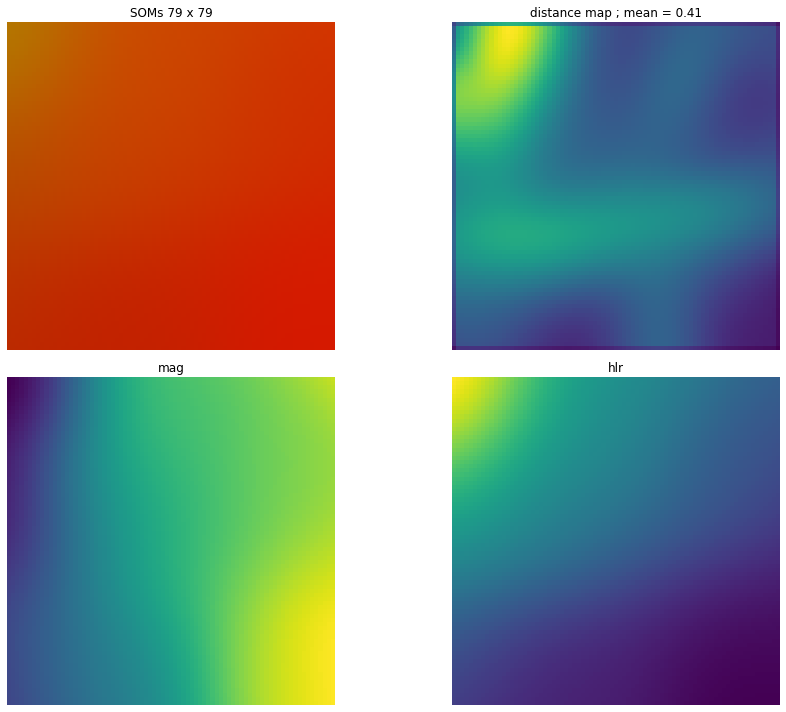

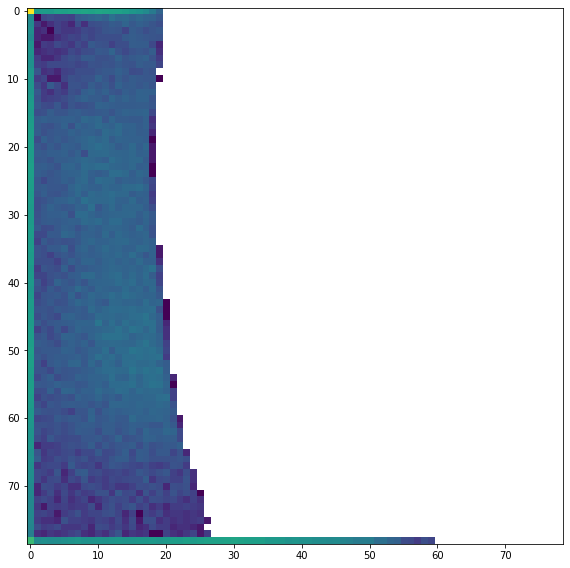

In [ ]:
sigma = 25
learning_rate = 1
topo = 'rectangular'

som_tu, weights_tu = train_som(choice_tu, sigma, learning_rate, 2000, topology=topo)
PlotSOMs(choice_tu, som_tu, weights_tu, vars_tu, topology=topo)

Heatmap(som_tu, choice_cs, hit_count=False, figsize=(8,8), topology=topo)

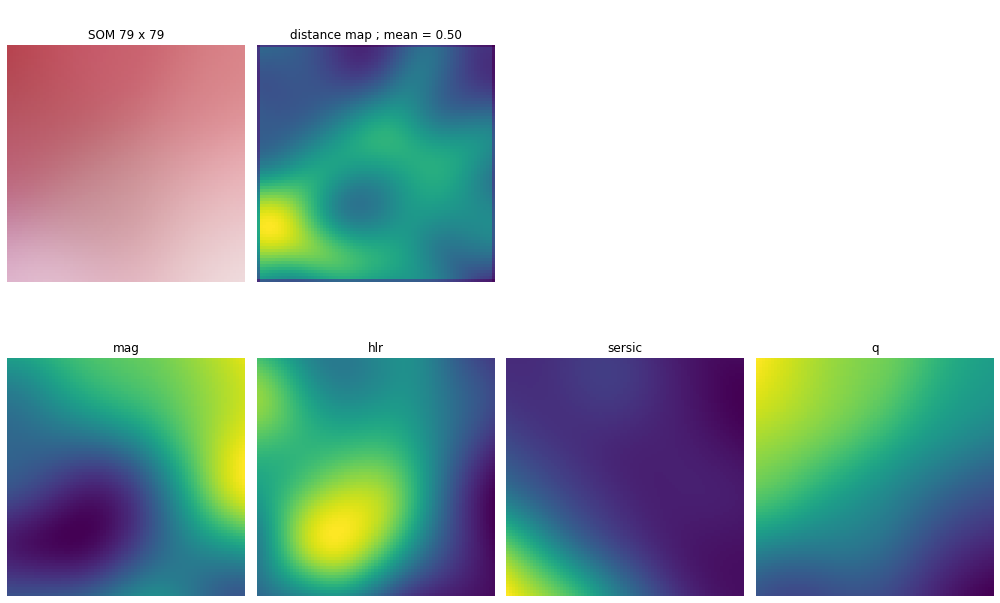

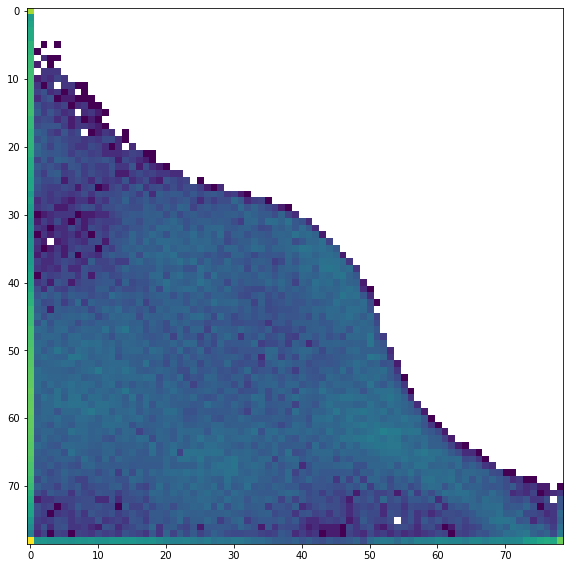

In [ ]:
sigma = 25
learning_rate = 1
topo = 'rectangular'

som_tu, weights_tu = train_som(choice_tu, sigma, learning_rate, 2000, topology=topo)
PlotSOMs(choice_tu, som_tu, weights_tu, vars_tu, topology=topo)

Heatmap(som_tu, choice_cs, hit_count=False, figsize=(8,8), topology=topo)

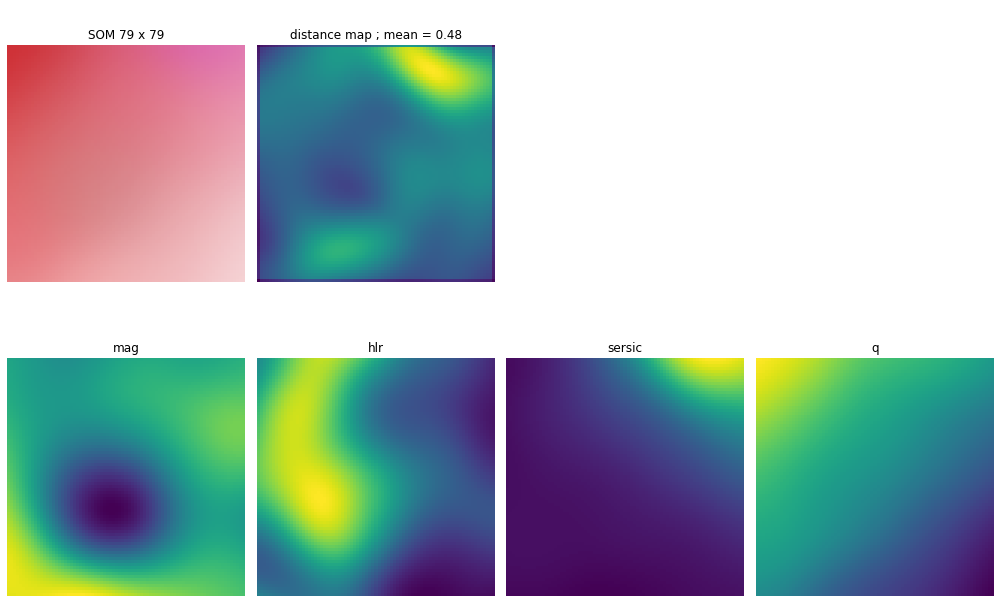

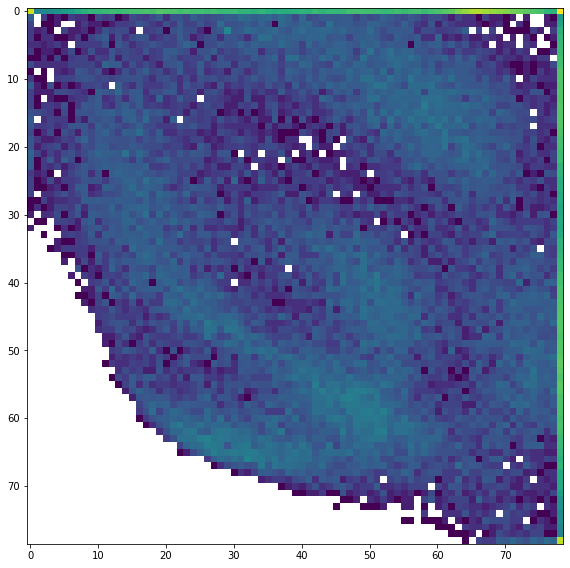

In [ ]:
sigma = 23
learning_rate = 1
topo='rectangular'

som_tu, weights_tu = train_som(choice_tu, sigma, learning_rate, 2000, topology=topo)
PlotSOMs(choice_tu, som_tu, weights_tu, vars_tu, topology=topo)

Heatmap(som_tu, choice_cs, hit_count=False, figsize=(8,8), topology=topo)

 Building hexagonal maps : [ 6241 / 6241 ] ; 100 %

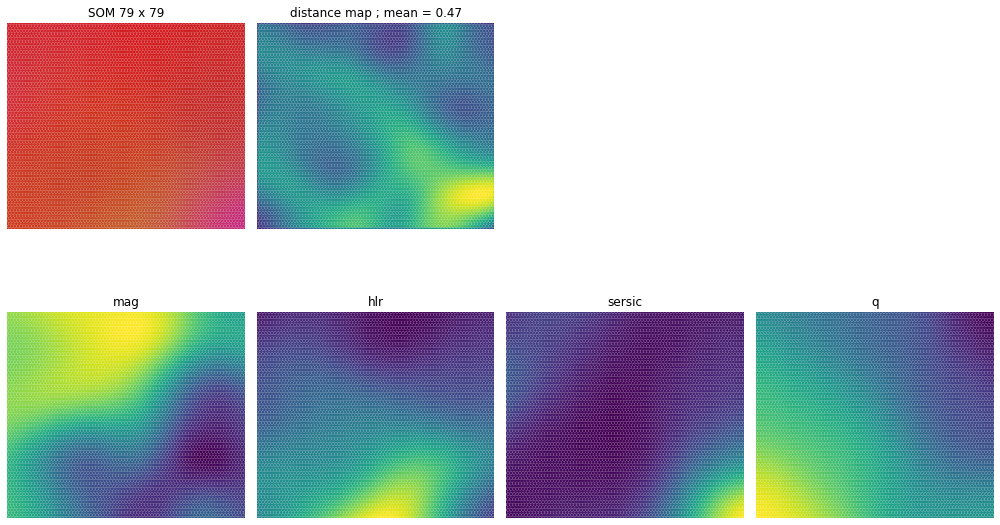

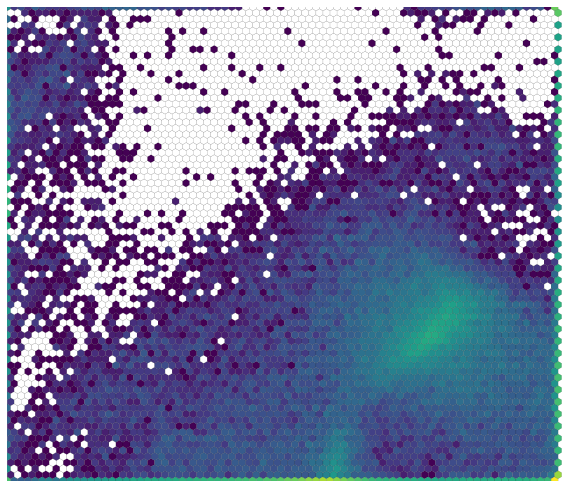

In [ ]:
sigma = 22
learning_rate = 1
topo = 'hexagonal'

som_tu, weights_tu = train_som(choice_tu, sigma, learning_rate, 2000, topology=topo)
PlotSOMs(choice_tu, som_tu, weights_tu, vars_tu, topology=topo)

Heatmap(som_tu, choice_cs, hit_count=False, figsize=(8,8), topology=topo)

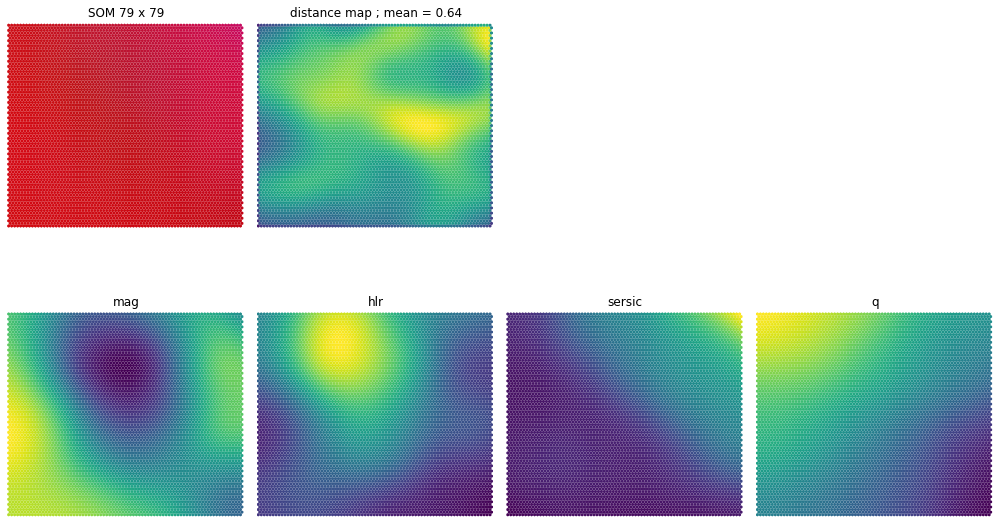

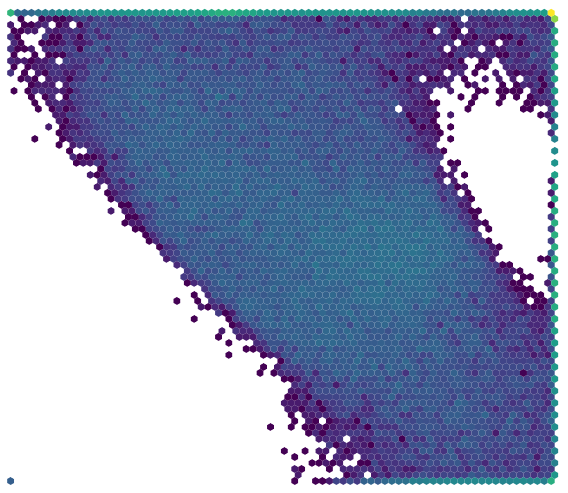

In [ ]:
sigma = 22
learning_rate = 1
topo = 'hexagonal'

som_tu, weights_tu = train_som(choice_tu, sigma, learning_rate, 2000, topology=topo)
PlotSOMs(choice_tu, som_tu, weights_tu, vars_tu, topology=topo)

Heatmap(som_tu, choice_cs, hit_count=False, figsize=(8,8), topology=topo)

---

#### Check Gx properties near mag 25.2 cut

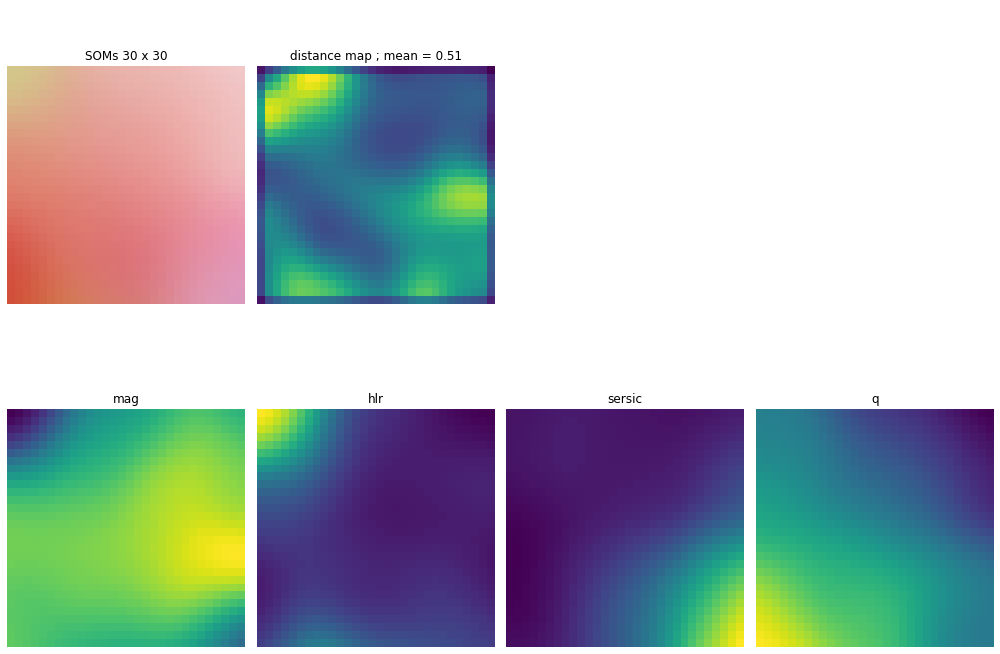

In [ ]:
sigma = 8
learning_rate = 1

som_tu, weights_tu = train_som(xtrain_tu, sigma, learning_rate, 2000, size=(30,30))
PlotSOMs(xtrain_tu, som_tu, weights_tu, vars_tu)

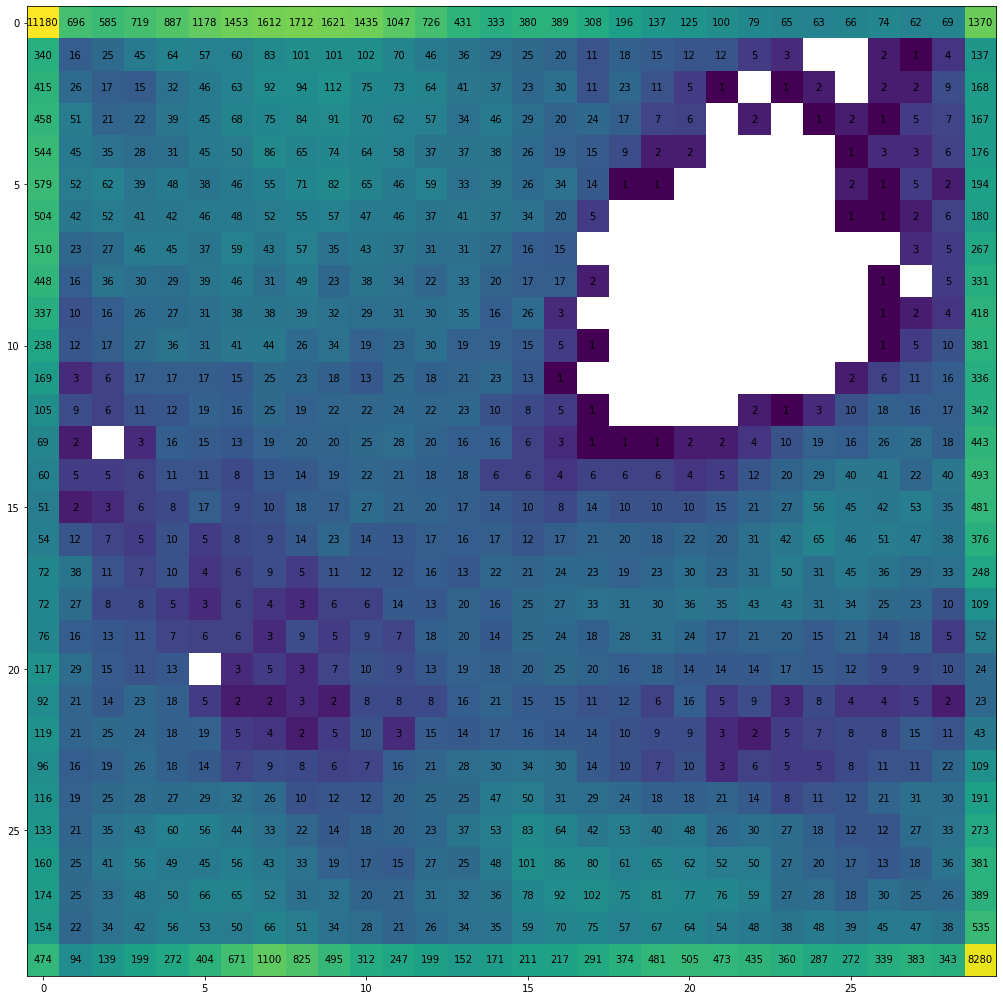

In [ ]:
Heatmap(som_tu, choice_cs, hist_vars=False)

In [ ]:
def act_show(dat, hit=True):
    print(np.argwhere(som_tu.activation_response(dat)))

    plt.imshow(som_tu.activation_response(dat))
    if hit:
        Heatmap(som_tu, choice_cs, figsize=(8,8), hist_vars=False, hit_count=False)

In [ ]:
def get_loc(cat, loc):
    get_idx=[]
    for i,j in enumerate(cat):
        idx = np.argwhere(som_tu.activation_response([j]))[0]
        if sum(idx==loc)==2:
            get_idx.append(i)
    return get_idx

#get_loc(choice_cs, [0,0])

In [ ]:
def check_hist_pos(dat, cat):
    plt.figure(figsize=(18,4))
    for i, vars in enumerate(cat):
        plt.subplot(1,4,i+1)
        plt.title(vars +' ; min=%.2f, max=%.2f\n' % (min(cat[vars]), max(cat[vars])))
        plt.axvline(dat[i], color='k')
        plt.hist(cat[vars], bins=100, density=True)
    plt.tight_layout()
    plt.show()

test hist(s) point proche d'un trou

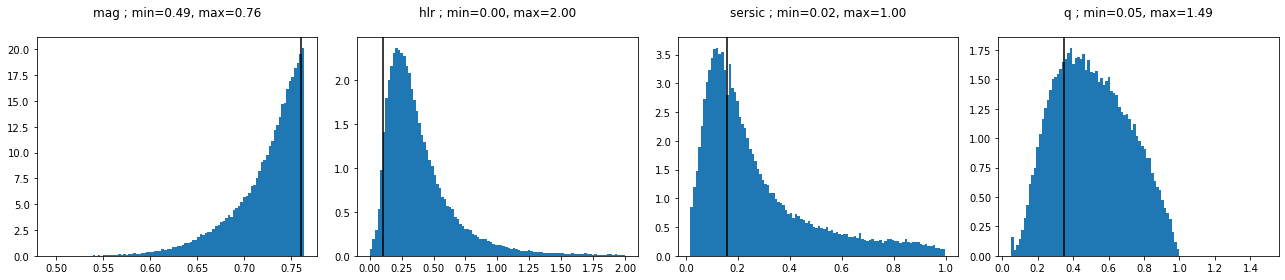

In [ ]:
# galaxie dans COSMOS dont l'activation_response est très proche d'un trou
check_hist_pos(choice_cs[40250], data_cs_norm) # (2, 23) coord inverted -> au dessus du trou

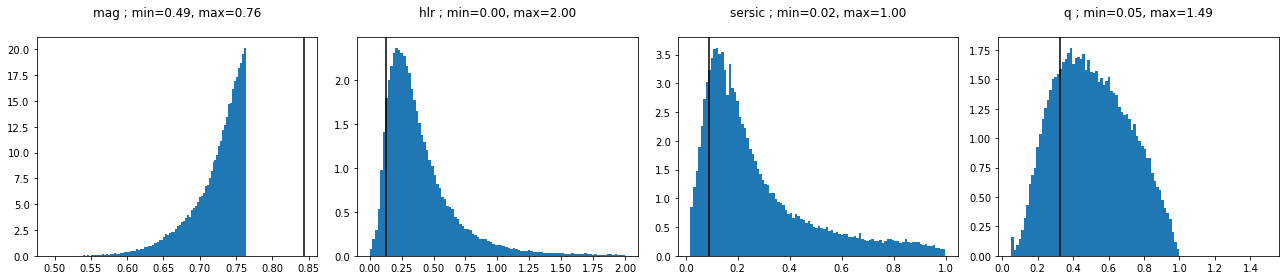

In [ ]:
check_hist_pos(choice_tu[171], data_cs_norm) # (2, 23)

le trou correspond donc bien au manque de Gx à forte mag (sup 25.2) dans CS

dans TU mag > 25.2 pour ce point et ceux du trou


bonne correspondance COSMOS TU pour tous les params sauf mag -> point dans les fortes mag et CS possède une limite à 25.2 en mag

---

ici coin sup gauche, correspond au pic de hlr

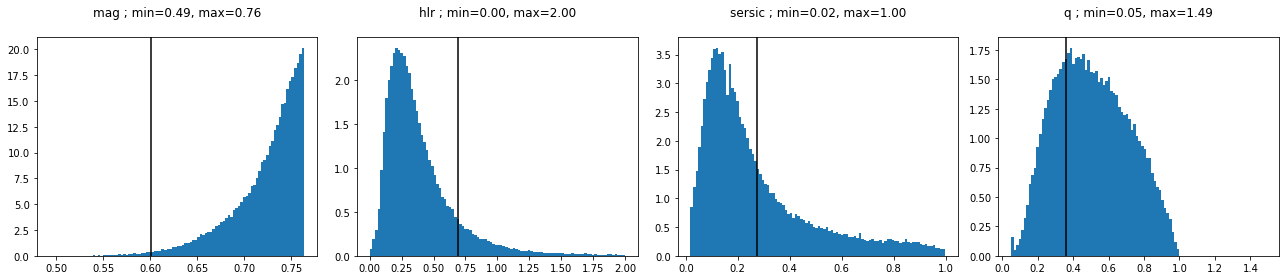

In [ ]:
check_hist_pos(choice_cs[8], data_cs_norm) # (0, 0)

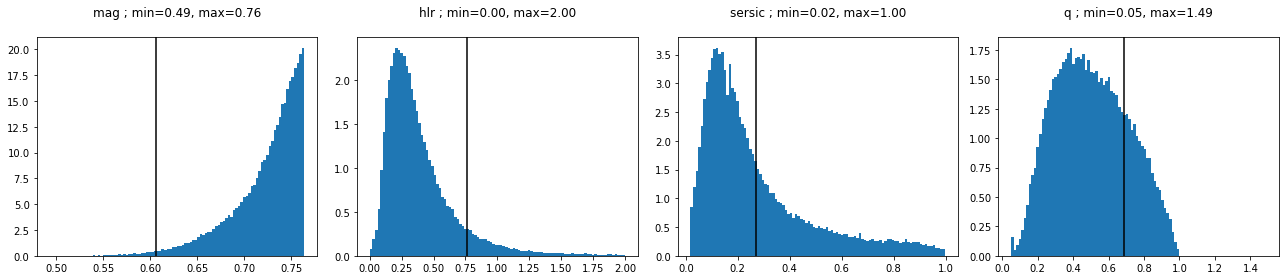

In [ ]:
check_hist_pos(choice_tu[110], data_cs_norm) # (0, 0)

en effet hlr assez fort et mag très faible

bonne correspondance COSMOS TU pour tous les params